<a href="https://colab.research.google.com/github/bsong75/brendensong.github.io/blob/main/20221229_OpenAI_API_Earnings_Call_Text_Sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started with OpenAI: Earnings Call Summaries

To use the OpenAI API from Python, we need to install the OpenAI Python package with pip.

In [1]:
!pip install openai -q

     |████████████████████████████████| 44 kB 1.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 147 kB 9.6 MB/s 


Once the openai package is installed, we need to import it.

In [2]:
import openai

## OpenAI API Keys

To use the API, you need an API key. If you haven't already, sign up for OpenAI. Visit the [API page on openai.com](https://openai.com/api/) and sign up. Under your account, visit the API Keys page and click "Create Secret Key". OpenAI provides $18.00 of credits to start, which is enough to get started:









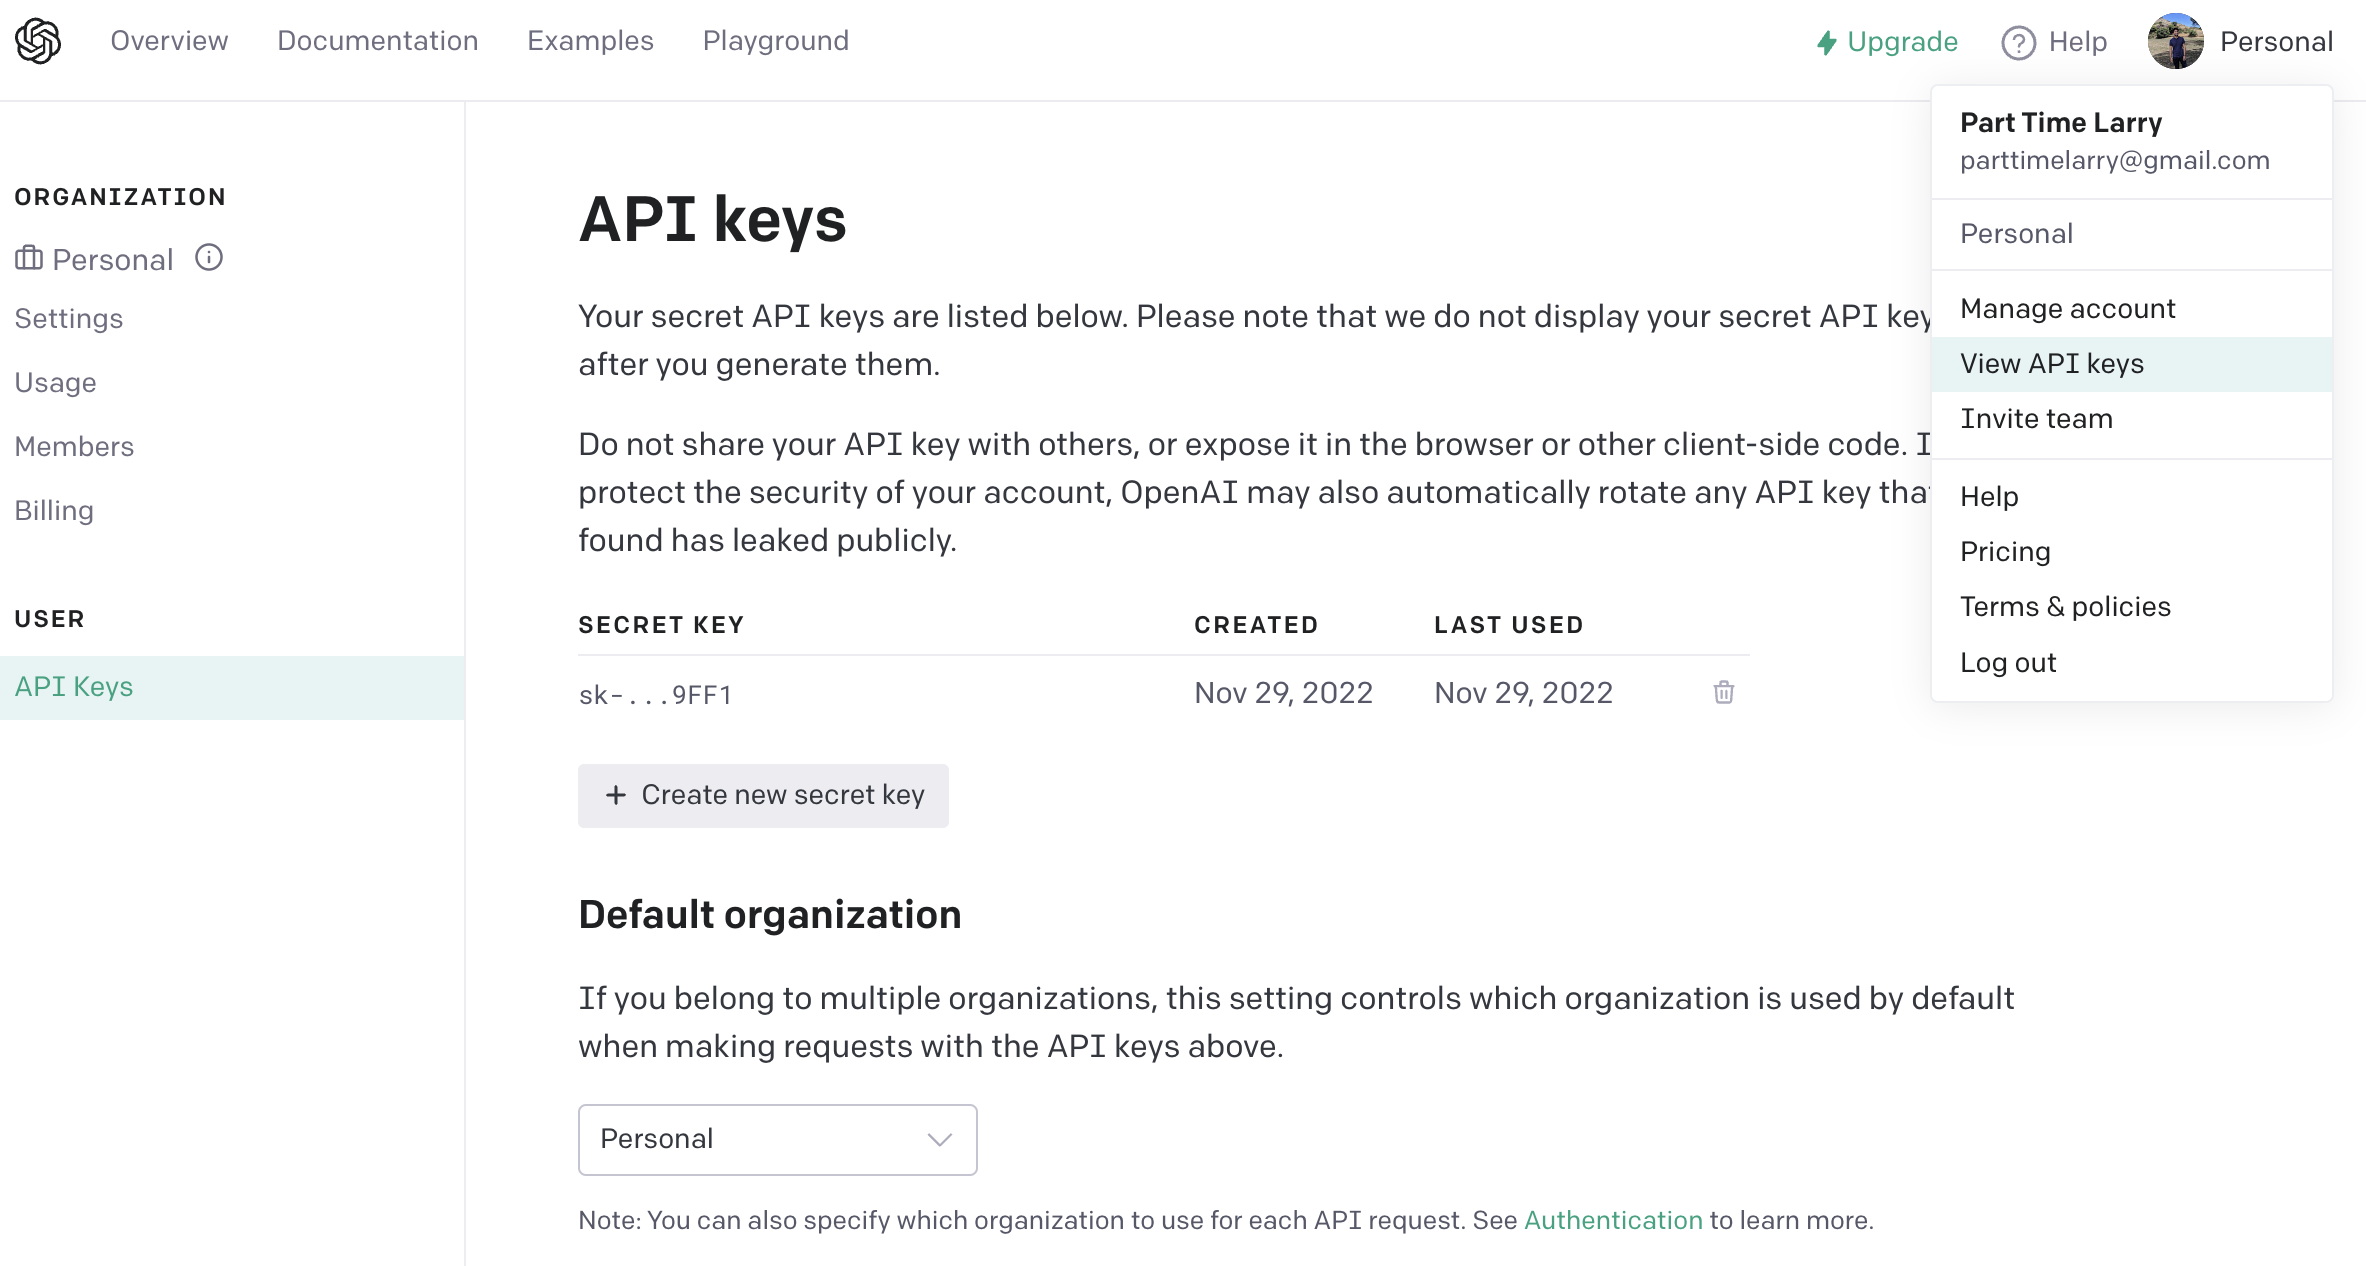

Now that we have an API key, we need to provide it to the OpenAI Python package. Since I want to input my API key without showing it here, I am going to import getpass and prompt myself for the API Key:

In [3]:
from getpass import getpass
openai.api_key = getpass()

··········


## OpenAI Playground

Now that we have access to the OpenAI API and have configured the Python package, what can we do with it? If you have not already done so, I suggest trying some of the examples in the [OpenAI Playground](https://beta.openai.com/examples). This will allow you to experiment with various prompts and their responses without writing any code.

# Calling OpenAI From Python

While it is fun to talk to GPT-3 from the Playground, we will get the most value out of OpenAI if we know how to code. With a few lines of Python, we can dynamically craft specific prompts, programmatically call OpenAI, and process the outputs. By doing this we can obtain interesting results and create our own custom applications. Let's start with a simple Q & A prompt and ask GPT-3 a question:

In [4]:
prompt = "I am a highly intelligent question answering bot. If you ask me a question that is rooted in truth, I will give you the answer. If you ask me a question that is nonsense, trickery, or has no clear answer, I will respond with \"Unknown\". Q: Who is the greatest investor of all time?\n\n"
engine = 'text-davinci-003'
response = openai.Completion.create(
  engine=engine, 
  prompt=prompt,
  temperature=0.3, # The temperature controls the randomness of the response, represented as a range from 0 to 1. A lower value of temperature means the API will respond with the first thing that the model sees; a higher value means the model evaluates possible responses that could fit into the context before spitting out the result.
  max_tokens=140,
  top_p=1, # Top P controls how many random results the model should consider for completion, as suggested by the temperature dial, thus determining the scope of randomness. Top P’s range is from 0 to 1. A lower value limits creativity, while a higher value expands its horizons.
  frequency_penalty=0,
  presence_penalty=1
)

response

<OpenAIObject text_completion id=cmpl-6SrxEQLorcFoBE8LmE9QfSnySDNl2 at 0x7f1030c403b0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\nThe greatest investor of all time is Warren Buffett."
    }
  ],
  "created": 1672338604,
  "id": "cmpl-6SrxEQLorcFoBE8LmE9QfSnySDNl2",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 11,
    "prompt_tokens": 66,
    "total_tokens": 77
  }
}

OpenAI replies that Warren Buffett is widely considered the greatest investor of all time. Notice that we set a variety of parameters in our code above: engine, prompt, temperature, max_tokens, etc. A full list of the available models and parameters are available on the [OpenAI GPT-3 models page](https://beta.openai.com/docs/models/gpt-3). You should experiment with different models and observe their differences and capabilities. They have different costs associated with them, so if you are performing a simpler task than you should use a simpler and cheaper model.

# Summarization Task

In the previous tutorial we used OpenAI Whisper to transcribe the audio of a Fed Speech. We can do the same to obtain the text transcript of an earnings call. I have provided a [transcript of the most recent Nvidia earnings call here](https://gist.github.com/hackingthemarkets/e664894b65b31cbe8993e02d25d26768). As you can see, this is quite a long earnings call which could take over an hour to listen to. In addition, it would take a long time to extract the most pertinent information from this call. Let's see if we can feed this earnings call to GPT-3 and have it process the language. We can do this by using the Summarization / TLDR prompt.

First, let's read the earnings call text into a variable. We can use the requests library to fetch the raw text of the earnings call that I have linked above:

In [5]:
import requests

url = "https://gist.githubusercontent.com/hackingthemarkets/e664894b65b31cbe8993e02d25d26768/raw/618afe09d07979cc72911ce79634ab5d2cc19a54/nvidia-earnings-call.txt"
response = requests.get(url)
transcript = response.text

transcript



"Operator\n\nGood afternoon. My name is Emma, and I will be your conference operator today. At this time, I would like to welcome everyone to the NVIDIA's third quarter earnings call. [Operator instructions] Simona Jankowski, you may begin your conference.\n\nSimona Jankowski -- Vice President, Investor Relations\n\nThank you. Good afternoon, everyone, and welcome to NVIDIA's conference call for the third quarter of fiscal 2023. With me today from NVIDIA are Jen-Hsun Huang, president and chief executive officer; and Colette Kress, executive vice president and chief financial officer. I'd like to remind you that our call is being webcast live on NVIDIA's investor relations website.\n\n\nThe webcast will be available for replay until the conference call to discuss our financial results for the fourth quarter and fiscal 2023. The content of today's call is NVIDIA's property. It can't be reproduced or transcribed without our prior written consent. During this call, we may make forward-look

Now that we have the earnings text in a data variable, let's make this into a summarization prompt. To do this, we can simply append "tldr;" and some carriage returns to the data:

In [6]:
prompt = f"{transcript}\n\ntl;dr:"

prompt

"Operator\n\nGood afternoon. My name is Emma, and I will be your conference operator today. At this time, I would like to welcome everyone to the NVIDIA's third quarter earnings call. [Operator instructions] Simona Jankowski, you may begin your conference.\n\nSimona Jankowski -- Vice President, Investor Relations\n\nThank you. Good afternoon, everyone, and welcome to NVIDIA's conference call for the third quarter of fiscal 2023. With me today from NVIDIA are Jen-Hsun Huang, president and chief executive officer; and Colette Kress, executive vice president and chief financial officer. I'd like to remind you that our call is being webcast live on NVIDIA's investor relations website.\n\n\nThe webcast will be available for replay until the conference call to discuss our financial results for the fourth quarter and fiscal 2023. The content of today's call is NVIDIA's property. It can't be reproduced or transcribed without our prior written consent. During this call, we may make forward-look

Now that we have a prompt, let's call OpenAI using this prompt:

In [7]:
response = openai.Completion.create(
    engine="text-davinci-003", 
    prompt=prompt,
    temperature=0.3, # The temperature controls the randomness of the response, represented as a range from 0 to 1. A lower value of temperature means the API will respond with the first thing that the model sees; a higher value means the model evaluates possible responses that could fit into the context before spitting out the result.
    max_tokens=140,
    top_p=1, # Top P controls how many random results the model should consider for completion, as suggested by the temperature dial, thus determining the scope of randomness. Top P’s range is from 0 to 1. A lower value limits creativity, while a higher value expands its horizons.
    frequency_penalty=0,
    presence_penalty=1
)

InvalidRequestError: ignored

## Chunking up our data

Notice that we receive an error. This is because the API can not accept the entire document at once: there is a token limit for the input. To get around this, let's process our data. We'll split up the document into smaller chunks, generate a prompt for each chunk, then ask OpenAI to summarize each chunk. We'll then collate / concatenate the responses into a single summary at the end.

There are many ways to slice and dice text. Let's try first splitting up our text into a list of words, then dividing that list of words into equal chunks using numpy. 

In [8]:
words = transcript.split(" ")

# show the first 20 words
words[:20]

['Operator\n\nGood',
 'afternoon.',
 'My',
 'name',
 'is',
 'Emma,',
 'and',
 'I',
 'will',
 'be',
 'your',
 'conference',
 'operator',
 'today.',
 'At',
 'this',
 'time,',
 'I',
 'would',
 'like']

Now let's use numpy's array_split function to divide our list of words into equal parts - I'm hardcoding the number 6 here to divide the text into 6 equal parts, but you can create special rules for dividing up the text as you see fit.


In [9]:
import numpy as np

chunks = np.array_split(words, 6)

chunks

[array(['Operator\n\nGood', 'afternoon.', 'My', ..., 'total', 'number',
        'of'], dtype='<U28'),
 array(['RTX', 'games', 'and', ..., 'path', 'forward', 'as'], dtype='<U28'),
 array(['general', 'purpose', 'computing', ..., 'that', 'while', 'they'],
       dtype='<U28'),
 array(['can', 'still', 'get', ..., 'taking', 'the', 'question.'],
       dtype='<U28'),
 array(['I', 'want', 'to', ..., 'Huang', '--', 'President'], dtype='<U28'),
 array(['and', 'Chief', 'Executive', ..., 'progress', 'next', 'quarter.'],
       dtype='<U28')]

As you can see, we now have 6 arrays of words. We can join each of these 6 chunks into their original text and pass each of them as a call to OpenAI to obtain a summary. We will save each summary response to a list, then join them all at the end into a single summary.

Before we call OpenAI 6 times, let's first walk through how a single chunk summary looks and make sure our first call works. Let's summarize the first chunk, chunks[0].



In [10]:
sentences = ' '.join(list(chunks[0]))

sentences

"Operator\n\nGood afternoon. My name is Emma, and I will be your conference operator today. At this time, I would like to welcome everyone to the NVIDIA's third quarter earnings call. [Operator instructions] Simona Jankowski, you may begin your conference.\n\nSimona Jankowski -- Vice President, Investor Relations\n\nThank you. Good afternoon, everyone, and welcome to NVIDIA's conference call for the third quarter of fiscal 2023. With me today from NVIDIA are Jen-Hsun Huang, president and chief executive officer; and Colette Kress, executive vice president and chief financial officer. I'd like to remind you that our call is being webcast live on NVIDIA's investor relations website.\n\n\nThe webcast will be available for replay until the conference call to discuss our financial results for the fourth quarter and fiscal 2023. The content of today's call is NVIDIA's property. It can't be reproduced or transcribed without our prior written consent. During this call, we may make forward-look

In [11]:

prompt = f"{sentences}\n\ntl;dr:"

response = openai.Completion.create(
    engine="text-davinci-003", 
    prompt=prompt,
    temperature=0.3, # The temperature controls the randomness of the response, represented as a range from 0 to 1. A lower value of temperature means the API will respond with the first thing that the model sees; a higher value means the model evaluates possible responses that could fit into the context before spitting out the result.
    max_tokens=140,
    top_p=1, # Top P controls how many random results the model should consider for completion, as suggested by the temperature dial, thus determining the scope of randomness. Top P’s range is from 0 to 1. A lower value limits creativity, while a higher value expands its horizons.
    frequency_penalty=0,
    presence_penalty=1
)

response_text = response["choices"][0]["text"]
response_text

"\n\nNVIDIA's third quarter earnings call was held on November 16, 2022. At the call, Colette Kress, executive vice president and chief financial officer, reported that revenue for the quarter was $5.93 billion, down 12% sequentially and 17% year-on-year. Data center revenue was up 1% sequentially and 31% year-on-year, driven by leading U.S. cloud providers and a broadening set of consumer Internet companies. Gaming and pro visualization platforms declined due to channel inventory corrections and challenging external conditions. The U.S. government announced new restrictions impacting exports of certain products to China, which impacted third quarter revenue. NVIDIA also announced collaborations"

This looks pretty good! Let's now loop through all of the chunks and save the responses in a list called summary_responses. At the end we'll join all of the responses into a single summary and check out the output.

In [12]:
summary_responses = []

for chunk in chunks:
    
    sentences = ' '.join(list(chunk))

    prompt = f"{sentences}\n\ntl;dr:"

    response = openai.Completion.create(
        engine="text-davinci-003", 
        prompt=prompt,
        temperature=0.3, # The temperature controls the randomness of the response, represented as a range from 0 to 1. A lower value of temperature means the API will respond with the first thing that the model sees; a higher value means the model evaluates possible responses that could fit into the context before spitting out the result.
        max_tokens=150,
        top_p=1, # Top P controls how many random results the model should consider for completion, as suggested by the temperature dial, thus determining the scope of randomness. Top P’s range is from 0 to 1. A lower value limits creativity, while a higher value expands its horizons.
        frequency_penalty=0,
        presence_penalty=1
    )

    response_text = response["choices"][0]["text"]
    summary_responses.append(response_text)

full_summary = "".join(summary_responses)

print("full summary")
print(full_summary)



full summary


Simona Jankowski welcomed everyone to NVIDIA's third quarter earnings call. Colette Kress, executive vice president and chief financial officer, reported that revenue was $5.93 billion, down 12% sequentially and 17% year-on-year. Data center revenue of $3.83 billion was up 1% sequentially and 31% year-on-year. Gaming revenue of $1.57 billion was down 23% sequentially and 51% year-on-year due to channel inventory corrections and external conditions. The U.S. government announced new export restrictions on A100 and H-100 based products to China, which impacted Q3 revenue. NVIDIA started shipping its flagship 100 data center GPU based on the ho

Colette Kress, NVIDIA's CFO, stated that the company expects gaming sell-through in Q4 to be stronger due to upcoming holidays and continued AI adoption. Jen-Hsun Huang, NVIDIA's CEO, added that their data center business is indexed to two fundamental dynamics: the need for accelerated computing to increase workloads while saving mo

Pretty cool right? I know this is a simple example, but it lays a solid baseline for building more complex applications. We can already convert audio to text and convert text from one form to another. From this, we can build a web or mobile apps that accept sound files, video files, or URLs. We can then have these applications call OpenAI to perform complex tasks and return interesting results. With further creativity and additional code, we can build some very useful apps!
